# TB2: Dog Breed Finder

## URLs para pruebas



*   Beagle: https://i.pinimg.com/564x/08/9c/83/089c831e1f1f7ff4c771bc6aee173a83.jpg 
*   Labrador: https://i.pinimg.com/564x/0e/10/0c/0e100cbee60a2dedb28238d04c76ffae.jpg
*   Rotwieler: https://i.pinimg.com/564x/e6/79/93/e67993871349cb43e297b36da3742a8b.jpg
*   Chihuahua: https://i.pinimg.com/564x/e6/80/d6/e680d69dd71e3968c950a81144e879ce.jpg



## Vinculación con Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Librerías

In [2]:
import os
import random as rn
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model
from ipywidgets import Button, HBox
%matplotlib inline

## Lectura de Datos
#### Acá se reemplaza la ruta del dataset

In [89]:
dataset = '/content/drive/MyDrive/' + 'dataset_perros/'

#### Se lee cada una de las imágenes de los 10 directorios de razas de perros del dataset
#### Se reescala todas las imágenes a 80x80 píxeles y se convierte a escala de grises.
#### Estas 2 cosas se hacen para la optimización y facilidad

In [90]:
DATADIR = dataset
RAZAS = ["Beagle", "Chihuahua", "Coker", "Doberman", "Golden Retriever", "Labrador", "Pastor Aleman", "Rotwieler", "Shih Tzu", "Yorkie"]

hg = 80

def datos():
  data = []
  for raza in RAZAS:
    path = os.path.join(DATADIR, raza)

    label = RAZAS.index(raza)
    print(label)

    listdir = os.listdir(path)

    for i in range(len(listdir)):
      image_name = listdir[i]
      img_path = os.path.join(path, image_name)

      try:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (hg, hg))
      except Exception as e:
        pass

      data.append([img, label])
  
  return data

#### También se aplica un shuffle que origina que se ponga al azar los datos

In [91]:
data = datos()

rn.shuffle(data)
x, y = [], []

n = len(data)
for i in range(n):
  x.append(data[i][0])
  y.append(data[i][1])

x = np.array(x).reshape(-1, hg, hg, 1)
x = x/255.0
y = np.array(y)
print("Lectura de datos exitosa!!")

0
1
2
3
4
5
6
7
8
9
Lectura de datos exitosa!!


## Cantidad de imágenes por Raza de Perro

[]

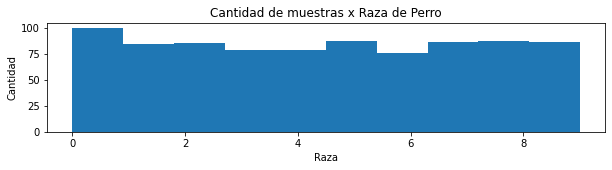

In [92]:
plt.figure(figsize=(10, 2))
plt.title("Cantidad de muestras x Raza de Perro")
plt.ylabel("Cantidad")
plt.xlabel("Raza")
plt.hist(y, bins=10)
plt.plot()

## Separar imagenes de entrenamiento y testeo
#### Con el test_size, se logra dividir el dataset en entrenamiento y testeo. Lo hemos puesto en 80% entrenamiento y 20% testeo

In [93]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y)

## Red Neuronal Convolucional

#### Ajustando la red neuronal

In [94]:
bs = 16
model = Sequential([Conv2D(32, 3, activation='relu', input_shape=(hg, hg, 1), padding='same'),
                    MaxPool2D(),
                    Conv2D(64, 3, activation='relu', padding='same'),
                    MaxPool2D(),
                    Conv2D(128, 3, activation='relu', padding='same'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(128, activation='relu'), 
                    Dense(10, activation='softmax')]) 
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 80, 80, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12800)            

## Entrenamiento y Guardado de la Red Neuronal

In [100]:
log = model.fit(X_train,y_train, epochs = 5, batch_size = bs, verbose = 0, validation_data = (X_test, y_test))

In [101]:
model.save_weights(dataset + 'save_model/')

## Cargado y Resultado de la Red Neuronal

In [102]:
loss, acc = model.evaluate(X_test, y_test, batch_size = 512, verbose = False)
print(f'Loss     = {loss:.4f}')
print(f'Accuracy = {acc:.4f}')

Loss     = 2.6653
Accuracy = 0.3860


## Test
#### Para el test se saca una imágen del grupo guardado del testeo anterior

(80, 80, 1)


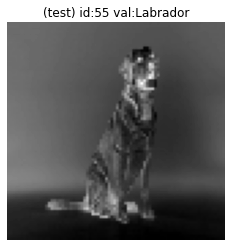

[7.1233907e-04 3.0060887e-01 2.7437869e-02 1.0244700e-03 2.9477790e-01
 3.3392474e-01 3.8519870e-03 1.2834760e-04 1.9149834e-02 1.8383669e-02]


In [103]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
print(im.shape)
label = y_test[idx]
plt.title('(test) id:{} val:{}'.format(idx, RAZAS[label]))
plt.axis('off')
plt.imshow(-im[:,:,0], cmap='gray')
plt.show()
salida = model.predict(im[None,:,:,:])[0]
print(salida)

## Predicción de la red neuronal

<BarContainer object of 10 artists>

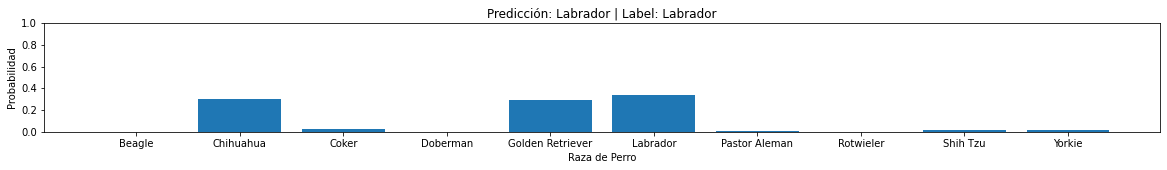

In [104]:
plt.figure(figsize=(20, 2))
plt.title("Predicción: {} | Label: {}".format(RAZAS[salida.argmax()], RAZAS[label]))
plt.ylabel("Probabilidad")
plt.xlabel("Raza de Perro")
plt.ylim([0, 1])
plt.bar(RAZAS, salida)

## Test con imagen de Web
#### Acá se utiliza una dirección url de una imágen. Se puede utilizar los links del comienzo del programa para mayor facilidad.

https://i.pinimg.com/564x/e6/80/d6/e680d69dd71e3968c950a81144e879ce.jpg


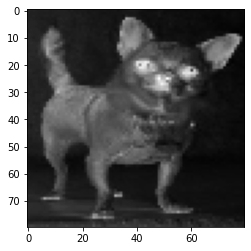

[5.18429442e-04 7.67640173e-01 3.90444067e-03 3.47370624e-05
 1.12921588e-01 1.00654244e-01 2.68154225e-04 4.16836010e-05
 9.09668580e-03 4.91997181e-03]


In [107]:
link = input()
temp_path = dataset + 'temp/temp.jpg'

real_image = imread(link)
cv2.imwrite(temp_path, real_image)

real_image = cv2.imread(temp_path, cv2.IMREAD_GRAYSCALE)
x = cv2.resize(real_image, (hg,hg))

p = []
p.append(x)
p = np.array(p).reshape(-1, hg, hg, 1)
p = p/255.0

mn = p[0]
plt.imshow(-mn[:,:,0], cmap='gray')
plt.show()

salida2 = model.predict(mn[None,:,:,:])[0]
print(salida2)

## Predicción en base al link

<BarContainer object of 10 artists>

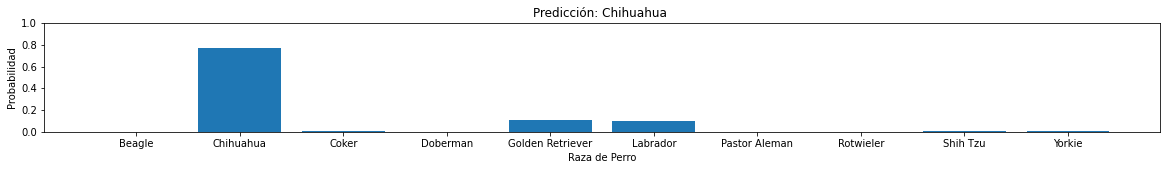

In [108]:
plt.figure(figsize=(20, 2))
plt.title("Predicción: {} ".format(RAZAS[salida2.argmax()], RAZAS[label]))
plt.ylabel("Probabilidad")
plt.xlabel("Raza de Perro")
plt.ylim([0,1])
plt.bar(RAZAS, salida2)

## Función para poder agregar una nueva imagen en el dataset de las razas de perro

In [109]:
def saveInDataSet():
  number = rn.uniform(1,10000000)
  save_path = DATADIR + RAZAS[salida2.argmax()] + '/' + str(number) +'.jpg'
  cv2.imwrite(save_path, real_image)
  print("Gracias por contribuir")
  print("La imagen se guardó en: ", save_path)

## ¿La predicción fue correcta?

In [110]:
thisandthat = ['SI', 'NO']

switch = [Button(description=name) for name in thisandthat]

combined = HBox([items for items in switch])

def upon_clicked(btn):
    print(f'The circuit is {btn.description}.', end='\x1b\r')
    for n in range(len(thisandthat)):
        switch[n].style.button_color = 'gray'
    btn.style.button_color = 'pink'
    if (btn.description=='SI'):
      saveInDataSet()
    else:
      print('La predicción fue errónea, pruebe con otra imagen.')


for n in range(len(thisandthat)):
    switch[n].on_click(upon_clicked)

display(combined)

Gracias por contribuir
La imagen se guardó en:  /content/drive/MyDrive/dataset_perros/Chihuahua/4903348.0092750685.jpg
